# Day 20

### Open CV [Continued]

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

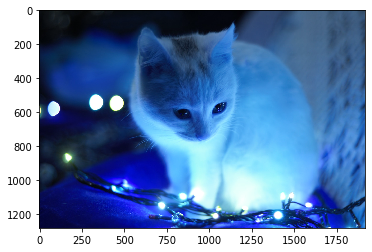

In [4]:
img = cv2.imread('Cat_1.jpg')
plt.imshow(img)

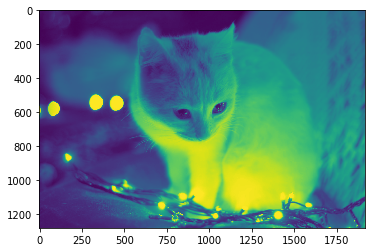

In [5]:
img = cv2.imread('Cat_1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

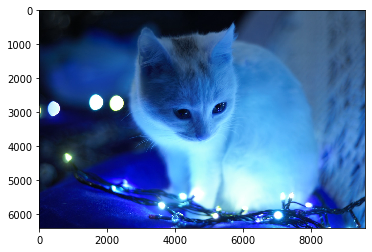

In [8]:
#Enlarging the image
img_scaled = cv2.resize(img, None, fx=5, fy=5, interpolation=cv2.INTER_AREA)
cv2.imwrite("High_res.jpg", img_scaled)
plt.imshow(img_scaled)

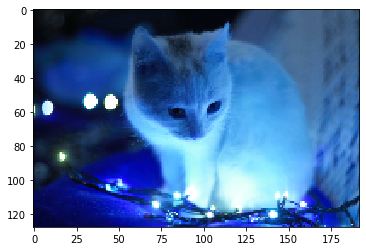

In [10]:
#Shrinking the image
img_scaled_2 = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_CUBIC)
cv2.imwrite("Low_res.jpg", img_scaled_2)
plt.imshow(img_scaled_2)

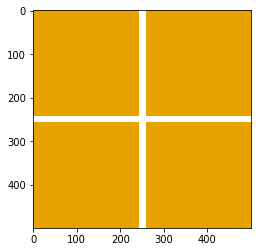

In [11]:
img = cv2.imread('windows.png')
plt.imshow(img)

In [12]:
num_rows, num_cols = img.shape[:2]

In [25]:
corner_points = np.float32([[0,0], [num_cols-1, 0], [0, num_rows-1], [num_cols-1, num_rows-1]])
corner_points

array([[  0.,   0.],
       [499.,   0.],
       [  0., 499.],
       [499., 499.]], dtype=float32)

In [26]:
edit_points = np.float32([[0,0.1*num_rows], [num_cols-1, 0], [0, 0.9*num_rows-1], [num_cols-1, num_rows-1]])
edit_points

array([[  0.,  50.],
       [499.,   0.],
       [  0., 449.],
       [499., 499.]], dtype=float32)

In [28]:
transform_matrix = cv2.getPerspectiveTransform(corner_points, edit_points)
transform_matrix

array([[ 7.99599198e-01,  0.00000000e+00,  0.00000000e+00],
       [-1.00200401e-01,  7.99599198e-01,  5.00000000e+01],
       [-4.01604813e-04, -1.81345378e-19,  1.00000000e+00]])

In [29]:
img_out = cv2.warpPerspective(img, transform_matrix, (num_cols, num_rows))

In [30]:
cv2.imwrite("transformed_windows.png", img_out)

True

True

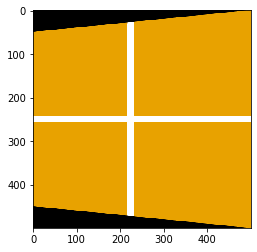

In [33]:
# Reversing above work...
img = cv2.imread('transformed_windows.png')
plt.imshow(img)
num_rows, num_cols = img.shape[:2]
edit_points = np.float32([[0,0], [num_cols-1, 0], [0, num_rows-1], [num_cols-1, num_rows-1]])
# corner_points
corner_points = np.float32([[0,0.1*num_rows], [num_cols-1, 0], [0, 0.9*num_rows-1], [num_cols-1, num_rows-1]])
# edit_points
transform_matrix = cv2.getPerspectiveTransform(corner_points, edit_points)
# transform_matrix
img_out = cv2.warpPerspective(img, transform_matrix, (num_cols, num_rows))
cv2.imwrite("reversed_windows.png", img_out)